# Plotting Notebook: Single Run

Hi! Welcome :) This code was created by Marilena and refreshed and documented by Annabelle.
The goal of this script is to create plot ToF, sigma ToF, and counts for a single run.
Make a copy and try with your own data! Need a hand? Please forward your questions to aczihaly@triumf.ca

#### import packages

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

#### define tof_resonance which needs 1 input: a dataframe

In [35]:
def tof_res(df): 

    ToF = []
    counts = []
    x = []
    sigma = []
    
    for i in range(0, max(df['x_step_idx'])+1): # for i in range 0 to the max value in x_step_idx col (inclusive)
        
        df_i = df.loc[df['x_step_idx']==i] # df_i is a new dataframe that has all rows where the value in df['x_step_idx'] is equal to i
        
        ToF.append(np.average(df_i['tof'])) 
        sigma.append(np.std(df_i['tof']))
        x.append(i) # i is just scan point
        counts.append(len(df_i['tof']))
        
    return ToF, sigma, x, counts

#### load data

In [36]:
df = pd.read_csv("run35613.csv") 

df = df.loc[df['tof']<=130] #apply tof cut to dateframe

ToF, sigma, x, counts = tof_res(df)

C:\Users\aczihaly\AppData\Local\anaconda3\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\aczihaly\AppData\Local\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [37]:
df.head() #take a look at the first 5 rows of data

,shot,event,tof,ch,pos_x,pos_y,quad_freq,dipole_freq,loop,shot.1,...,step_value_y,step_value_z,step_var_ppg,step_value_ppg,step_var_trapv,step_value_trapv,step_var_epics,step_value_epics,step_value_afg_freq,step_value_afg_volt
0,0,35,85.767993,1.0,-1000.0,-1000.0,0,0,0,5,...,[],[],['/Equipment/PPGCompiler/Programming/pulse_tra...,[0.0015],[],[],[],[],[],[]
1,1,35,85.782373,1.0,-1000.0,-1000.0,0,0,0,5,...,[],[],['/Equipment/PPGCompiler/Programming/pulse_tra...,[0.0015],[],[],[],[],[],[]
2,2,35,85.779199,2.0,-1000.0,-1000.0,0,0,0,5,...,[],[],['/Equipment/PPGCompiler/Programming/pulse_tra...,[0.0015],[],[],[],[],[],[]
3,3,35,85.792627,4.0,-1000.0,-1000.0,0,0,0,5,...,[],[],['/Equipment/PPGCompiler/Programming/pulse_tra...,[0.0015],[],[],[],[],[],[]
4,4,35,85.793213,3.0,-1000.0,-1000.0,0,0,0,5,...,[],[],['/Equipment/PPGCompiler/Programming/pulse_tra...,[0.0015],[],[],[],[],[],[]


#### create plots

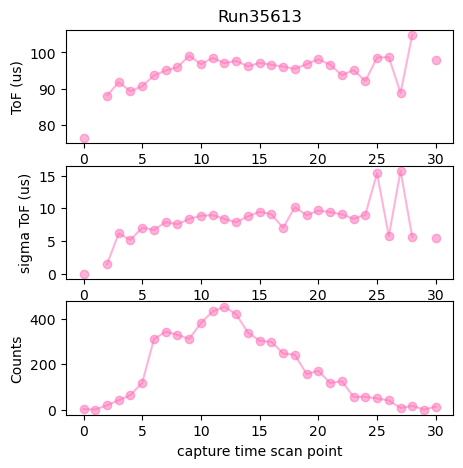

In [38]:
fig, axs = plt.subplots(3, figsize = [5,5])

axs[0].set_title('Run35613')
axs[0].plot(x, ToF, marker = 'o', color='hotpink', alpha=0.5)
axs[0].set_ylabel('ToF (us)')

axs[1].plot(x, sigma, marker = 'o', color='hotpink', alpha=0.5)
axs[1].set_ylabel('sigma ToF (us)')

axs[2].plot(x, counts, marker = 'o', color='hotpink', alpha=0.5)
axs[2].set_ylabel('Counts')
axs[2].set_xlabel('capture time scan point')

plt.savefig('run35613.png', dpi = 200)